## Assignment 1a: Machine Learning Methods

### Kusal Bista a1881044

#### How can we use data analytics to predict energy usage for this house?

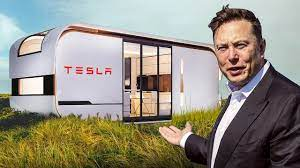

#### Follow detail instructions in the assignment specification and use these heading for implementation and discussion

### 1. Read the dataset

<b>Firstly, we load important packages and conduct preliminary data exploration on a downloaded dataset within a notebook environment. Then, initial rows was checked to have a overview of a dataset along with summary statitics. The missing values were also checked.</b>

In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.stats import norm

from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR

In [3]:
# reading  the dataset
dataset = pd.read_csv("energydata_complete.csv")

In [4]:
dataset.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11/01/2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,11/01/2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,11/01/2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,11/01/2016 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,11/01/2016 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [6]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Appliances,19735.0,97.694958,102.524891,10.000000,50.000000,60.000000,100.000000,1080.000000
lights,19735.0,3.801875,7.935988,0.000000,0.000000,0.000000,0.000000,70.000000
T1,19735.0,21.686571,1.606066,16.790000,20.760000,21.600000,22.600000,26.260000
RH_1,19735.0,40.259739,3.979299,27.023333,37.333333,39.656667,43.066667,63.360000
T2,19735.0,20.341219,2.192974,16.100000,18.790000,20.000000,21.500000,29.856667
RH_2,19735.0,40.420420,4.069813,20.463333,37.900000,40.500000,43.260000,56.026667
T3,19735.0,22.267611,2.006111,17.200000,20.790000,22.100000,23.290000,29.236000
RH_3,19735.0,39.242500,3.254576,28.766667,36.900000,38.530000,41.760000,50.163333
T4,19735.0,20.855335,2.042884,15.100000,19.530000,20.666667,22.100000,26.200000
RH_4,19735.0,39.026904,4.341321,27.660000,35.530000,38.400000,42.156667,51.090000


In [7]:
# checking for null values
dataset.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

### 2. Analyse and visualise the data

We check categorical and numerical variables present in the dataset to understand the overlying structure of the dataset. Also, it will helps in identifing different visualizing techniques.

In [8]:
def find_categorical(data):
    categorical = [var for var in data.columns if data[var].dtype == 'O']
    print(f'Categorical variables: {len(categorical)}')
    print('They are:')
    for index, cat_var in enumerate(categorical):
        print(f'\t{index+1}. {cat_var}')

In [9]:
find_categorical(dataset)

Categorical variables: 1
They are:
	1. date


In [10]:
def find_numerical(dataset):
    numerical = [var for var in dataset.columns if dataset[var].dtype == 'int64' or 'float64']
    print(f'Numerical variables: {len(numerical)} \n')
    print('They are:')
    for index, num_var in enumerate(numerical):
        print(f'\t{index+1}. {num_var}')

In [11]:
find_numerical(dataset)

Numerical variables: 29 

They are:
	1. date
	2. Appliances
	3. lights
	4. T1
	5. RH_1
	6. T2
	7. RH_2
	8. T3
	9. RH_3
	10. T4
	11. RH_4
	12. T5
	13. RH_5
	14. T6
	15. RH_6
	16. T7
	17. RH_7
	18. T8
	19. RH_8
	20. T9
	21. RH_9
	22. T_out
	23. Press_mm_hg
	24. RH_out
	25. Windspeed
	26. Visibility
	27. Tdewpoint
	28. rv1
	29. rv2


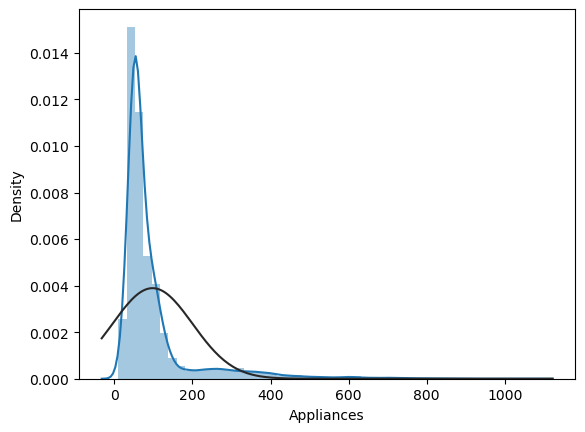

In [12]:
sns.distplot(dataset['Appliances'], fit=norm)
plt.show()

The target variable ‘Appliances’ is not normally distributed and is right skewed. Hence, linear regression cannot be performed. This can also affect the performance and the interpretability of some models. 

In [13]:
df = dataset.copy()

In [14]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11/01/2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,11/01/2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,11/01/2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,11/01/2016 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,11/01/2016 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [15]:
print(type(df['date'][0]))
print(df['date'][0])

<class 'str'>
11/01/2016 17:00


In [16]:
def convert_datetime(df, date_column):
    df[date_column] = pd.to_datetime(df[date_column], format="%d/%m/%Y %H:%M", errors='coerce')
    df['Date'] = df[date_column].dt.date
    df['Time'] = df[date_column].dt.time
    df['hour'] = df[date_column].dt.hour
    df['month'] = df[date_column].dt.month
    return df.drop([date_column], axis=1)

In [17]:
dataFrame = convert_datetime(df, 'date')

**Converting date time to 'Date', 'Time', 'Hour' and 'Month', to see the correlation between individual variable.**

In [18]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 non-null  float64
 19  RH_9

In [19]:
column_mapping = {
    'date': 'date',
    'Appliances': 'appliance_energy_consumption_wh',
    'lights': 'light_energy_consumption_wh',
    'T1': 'temperature_kitchen_area_c',
    'RH_1': 'humidity_kitchen_area_percent',
    'T2': 'temperature_living_room_area_c',
    'RH_2': 'humidity_living_room_area_percent',
    'T3': 'temperature_laundry_room_area_c',
    'RH_3': 'humidity_laundry_room_area_percent',
    'T4': 'temperature_office_room_c',
    'RH_4': 'humidity_office_room_percent',
    'T5': 'temperature_bathroom_c',
    'RH_5': 'humidity_bathroom_percent',
    'T6': 'temperature_outside_building_north_c',
    'RH_6': 'humidity_outside_building_north_percent',
    'T7': 'temperature_ironing_room_c',
    'RH_7': 'humidity_ironing_room_percent',
    'T8': 'temperature_teenager_room_2_c',
    'RH_8': 'humidity_teenager_room_2_percent',
    'T9': 'temperature_parents_room_c',
    'RH_9': 'humidity_parents_room_percent',
    'T_out': 'temperature_outside_chievres_c',
    'Press_mm_hg': 'pressure_chievres_mm_hg',
    'RH_out': 'humidity_outside_chievres_percent',
    'Windspeed': 'windspeed_chievres_m_s',
    'Visibility': 'visibility_chievres_km',
    'Tdewpoint': 'tdewpoint_chievres_c',
    'rv1': 'random_variable_1',
    'rv2': 'random_variable_2'
}

In [20]:
dataFrame = dataFrame.rename(columns=column_mapping)

In [21]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 32 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   appliance_energy_consumption_wh          19735 non-null  int64  
 1   light_energy_consumption_wh              19735 non-null  int64  
 2   temperature_kitchen_area_c               19735 non-null  float64
 3   humidity_kitchen_area_percent            19735 non-null  float64
 4   temperature_living_room_area_c           19735 non-null  float64
 5   humidity_living_room_area_percent        19735 non-null  float64
 6   temperature_laundry_room_area_c          19735 non-null  float64
 7   humidity_laundry_room_area_percent       19735 non-null  float64
 8   temperature_office_room_c                19735 non-null  float64
 9   humidity_office_room_percent             19735 non-null  float64
 10  temperature_bathroom_c                   19735

Changing the varibale name just for readability. 

In [22]:
appliance_energy_consumption_hr = dataFrame.groupby(by='hour', as_index=False )['appliance_energy_consumption_wh'].sum()
appliance_energy_consumption_hr

,hour,appliance_energy_consumption_wh
0,0,43390
1,1,42190
2,2,40340
3,3,39650
4,4,40570
5,5,43350
6,6,47440
7,7,64650
8,8,87250
9,9,92710


In [23]:
appliance_energy_consumption_hr.sort_values(by='appliance_energy_consumption_wh',ascending=False)

,hour,appliance_energy_consumption_wh
18,18,156670
17,17,133600
19,19,117600
11,11,109430
20,20,104380
10,10,103060
13,13,102540
12,12,101630
16,16,98560
9,9,92710


In [24]:
dataFrame['appliance_energy_consumption_wh'].nunique()

92

<Axes: >

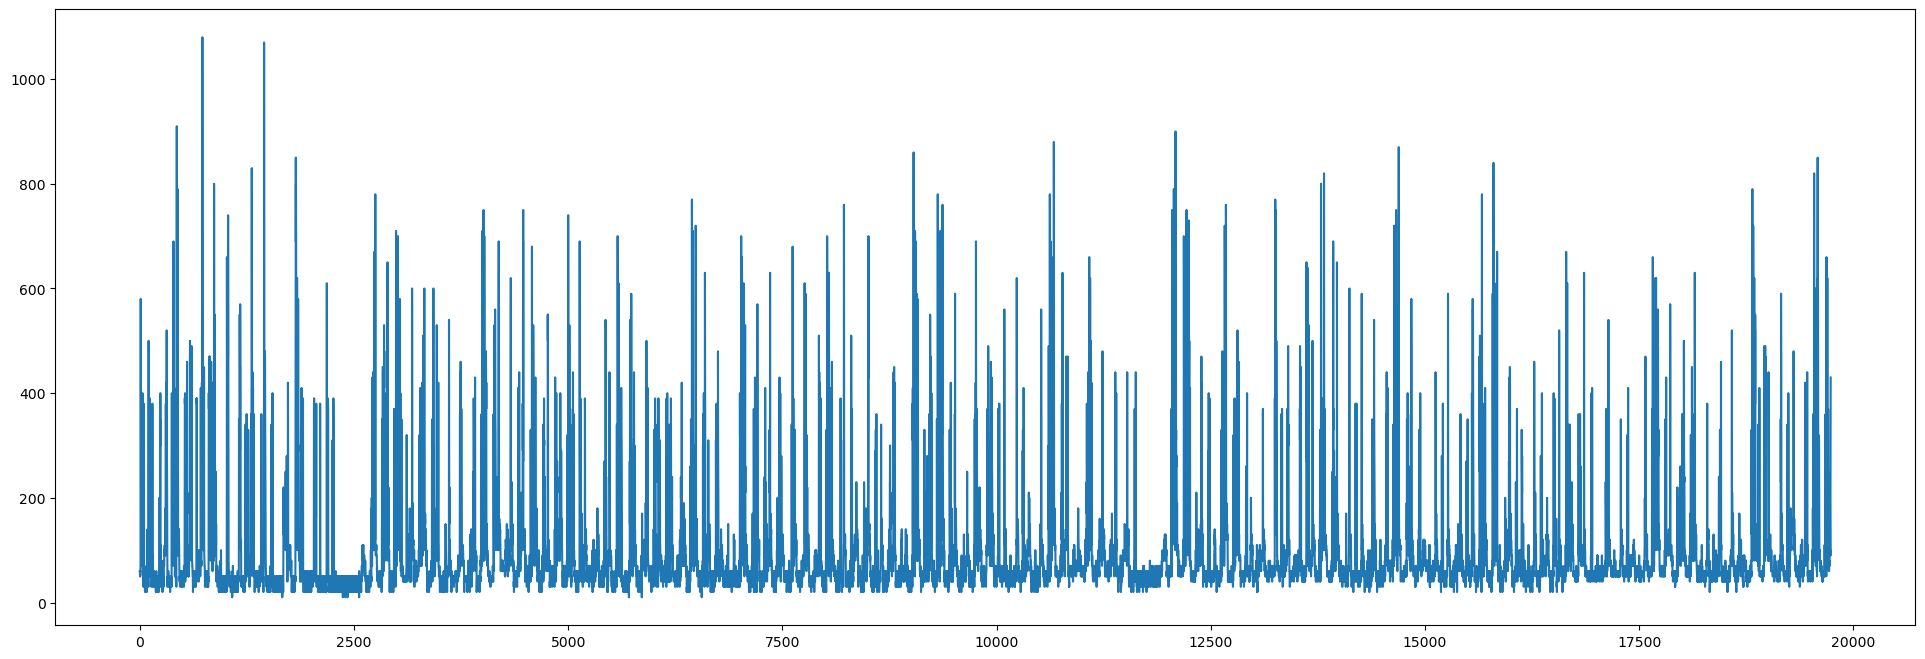

In [25]:
dataFrame['appliance_energy_consumption_wh'].plot(figsize=(24, 8))

Here 'hour' represents the hour in a day and 'appliance_energy_consumption_wh' represents the corresponding appliance energy consumption in watt-hours.

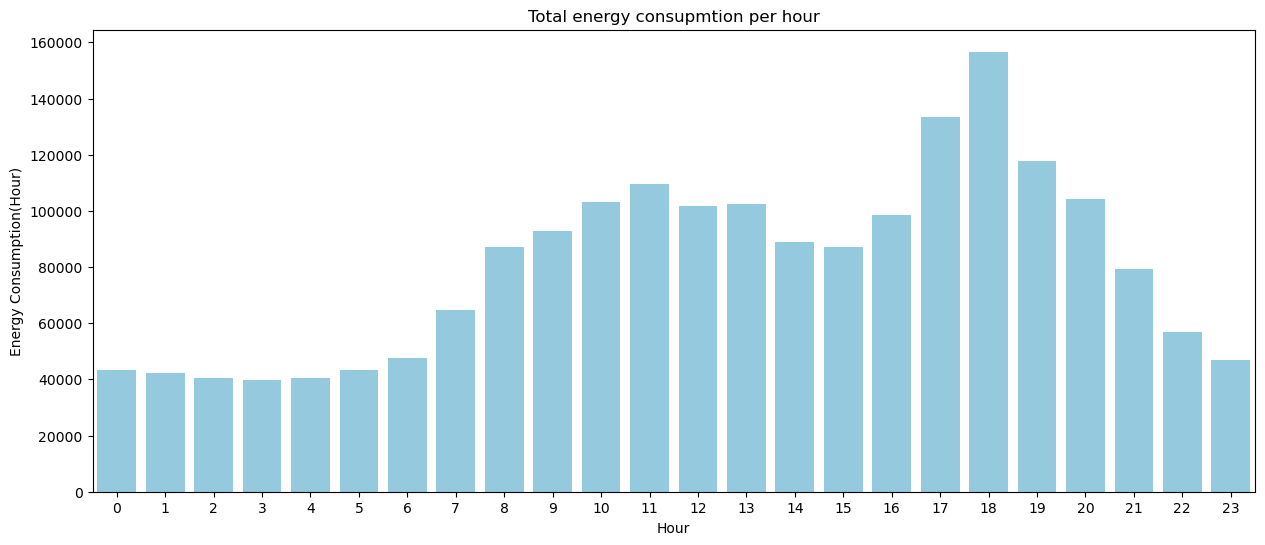

In [26]:
# Create a bar chart to show the total energy consumed by the appliance per hour
plt.subplots(figsize=(15,6))
hour_energy= sns.barplot(x=appliance_energy_consumption_hr.hour, y=appliance_energy_consumption_hr.appliance_energy_consumption_wh, color='skyblue')
plt.xlabel('Hour')
plt.ylabel('Energy Consumption(Hour)')
plt.title('Total energy consupmtion per hour')
plt.show()

We can see the highest energy is consumed at 6 pm where as, we can see very small usage between 11 P.M.  to 6 A.M.

In [27]:
appliance_energy_consumption_month = dataFrame.groupby(by='month', as_index=False )['appliance_energy_consumption_wh'].sum()
appliance_energy_consumption_month

,month,appliance_energy_consumption_wh
0,1,283510
1,2,421550
2,3,432800
3,4,427200
4,5,362950


Text(0.5, 1.0, 'Mean Energy Consumption per Month')

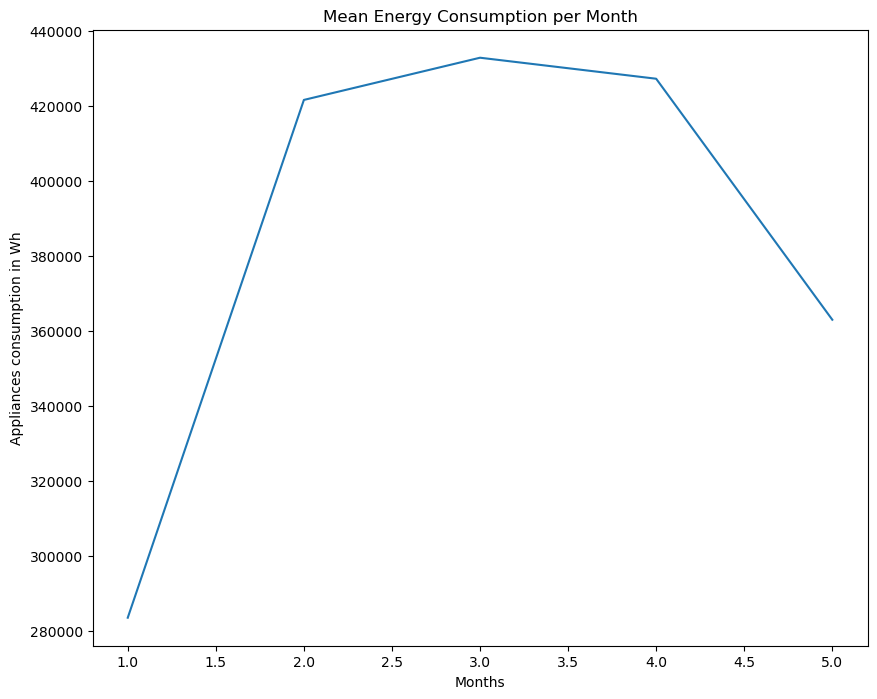

In [28]:
dataFrame.groupby('month')['appliance_energy_consumption_wh'].sum().plot(figsize=(10,8))
plt.xlabel('Months')
plt.ylabel('Appliances consumption in Wh')
plt.title('Mean Energy Consumption per Month')

The graph above represents monthly appliance energy consumption in watt-hours over a span of five months. We can see a increaing trend from January to march and after season changed we can see the consumption decreasing. 

In [30]:
def pairplot_func(a, b, c, d):
    sns.pairplot(dataFrame, x_vars=[a, b, c, d], y_vars='appliance_energy_consumption_wh', height=4, aspect=1, kind='scatter')
    plt.show()

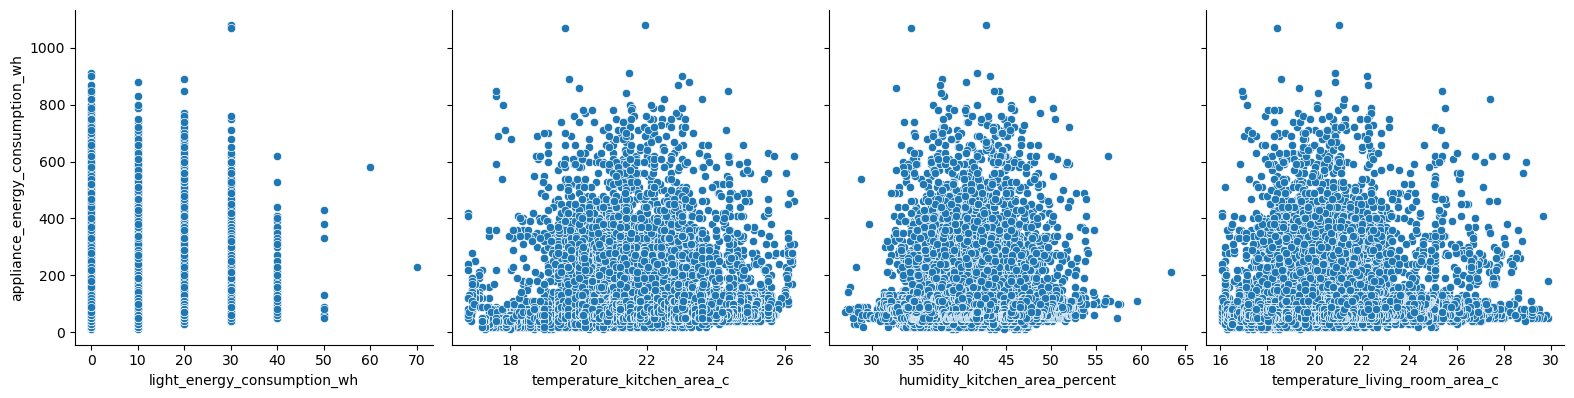

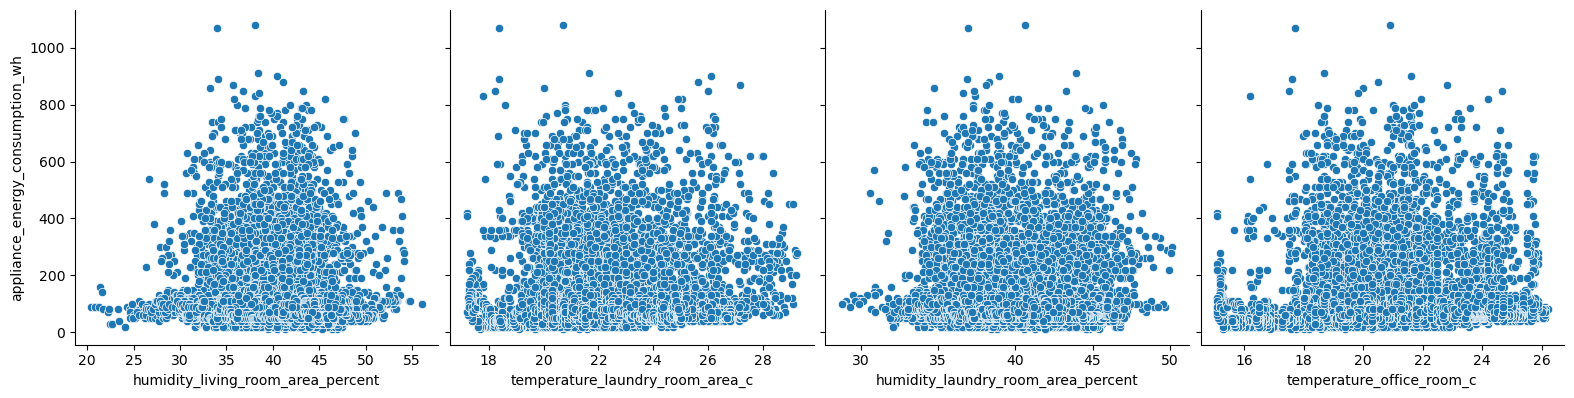

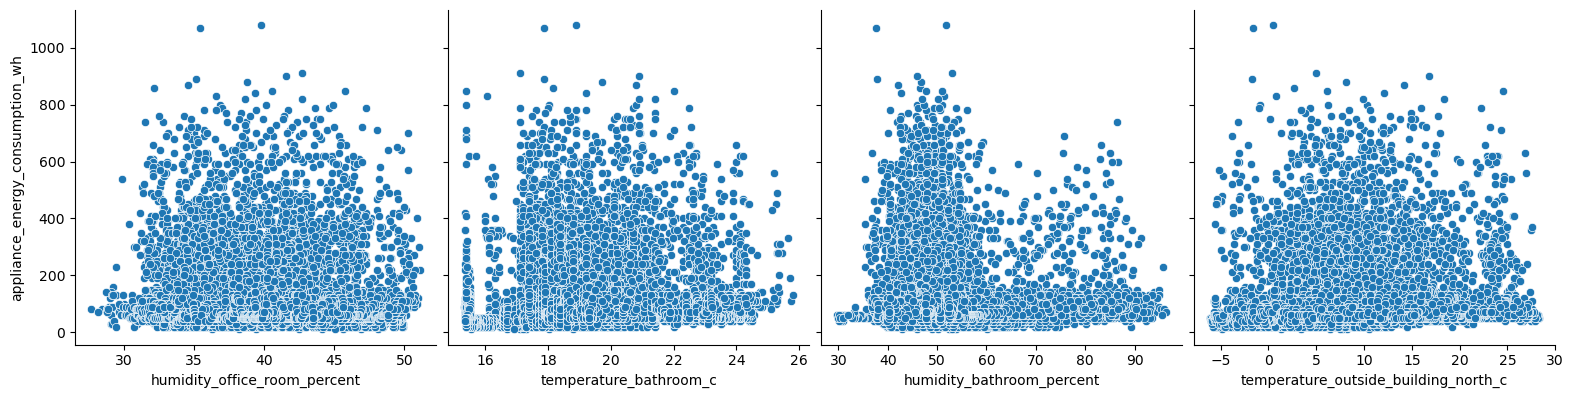

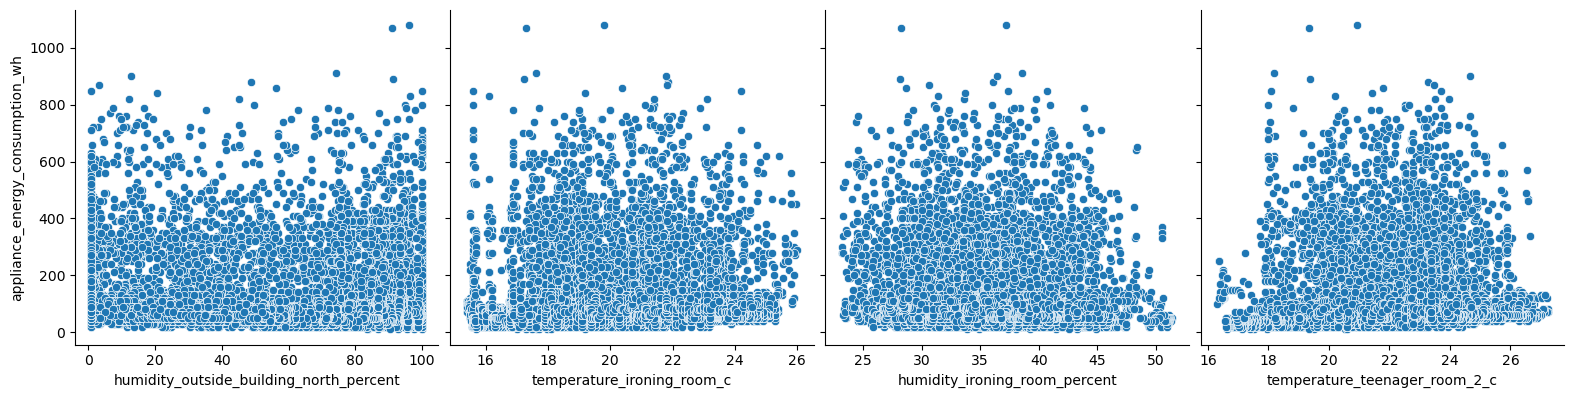

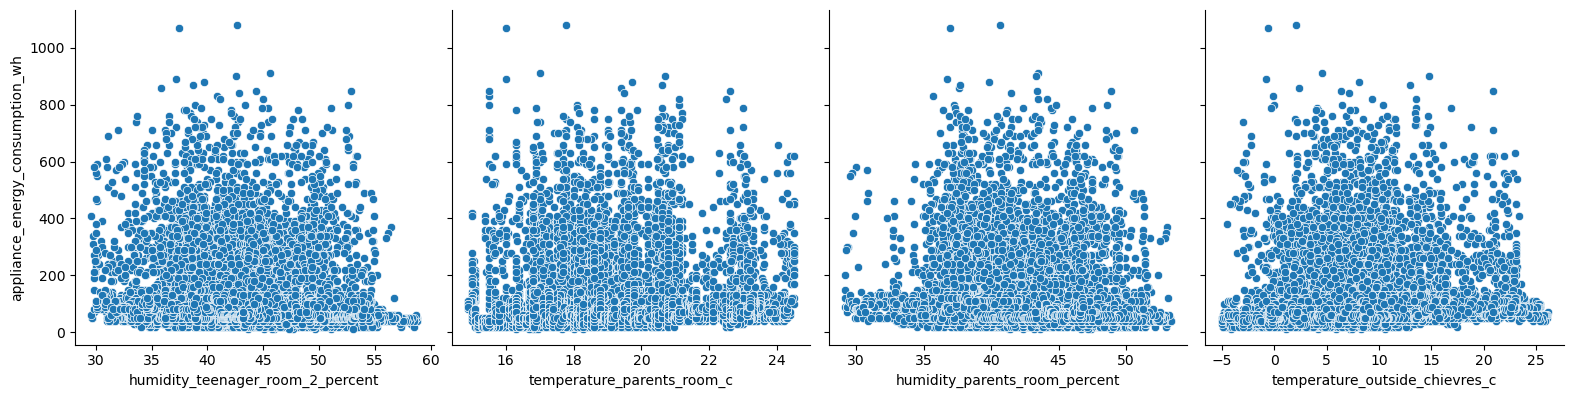

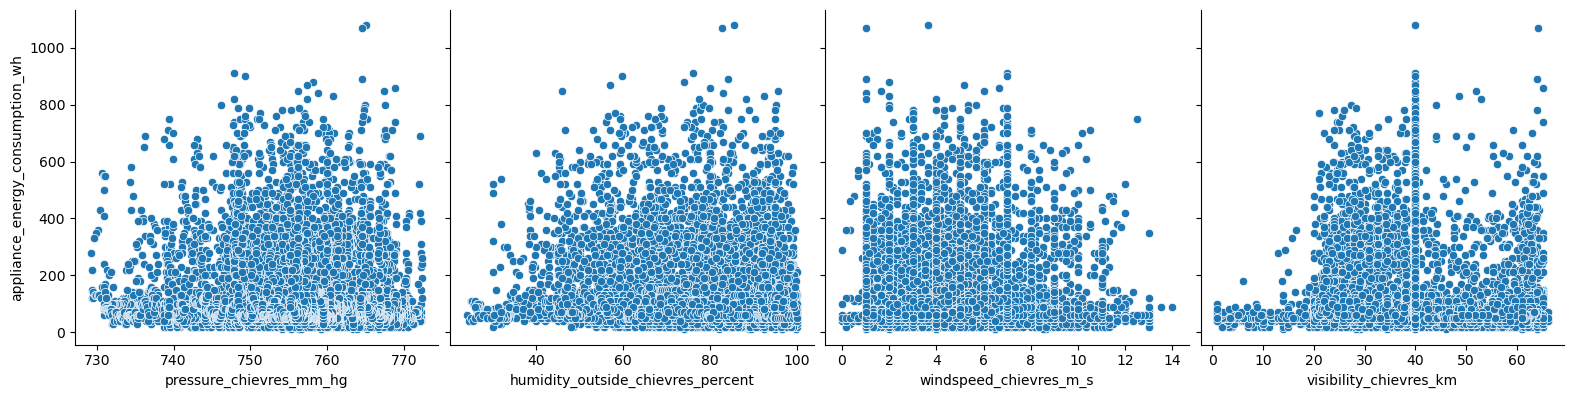

In [31]:
pairplot_func('light_energy_consumption_wh', 'temperature_kitchen_area_c', 'humidity_kitchen_area_percent', 'temperature_living_room_area_c')
pairplot_func('humidity_living_room_area_percent', 'temperature_laundry_room_area_c', 'humidity_laundry_room_area_percent', 'temperature_office_room_c')
pairplot_func('humidity_office_room_percent', 'temperature_bathroom_c', 'humidity_bathroom_percent', 'temperature_outside_building_north_c')
pairplot_func('humidity_outside_building_north_percent', 'temperature_ironing_room_c', 'humidity_ironing_room_percent', 'temperature_teenager_room_2_c')
pairplot_func('humidity_teenager_room_2_percent', 'temperature_parents_room_c', 'humidity_parents_room_percent', 'temperature_outside_chievres_c')
pairplot_func('pressure_chievres_mm_hg', 'humidity_outside_chievres_percent', 'windspeed_chievres_m_s', 'visibility_chievres_km')

In [32]:
df = df.drop(['Date','Time','hour', 'month'], axis=1)

In [33]:
correlation_matrix = df.corr()

In [34]:
correlation_matrix

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,1.000000,-0.009630,-0.189835,0.696974,-0.102760,0.515321,-0.092945,0.792938,-0.431939,0.781954,...,0.888546,-0.244647,0.588852,-0.026770,-0.336362,-0.257415,-0.096214,0.468751,0.000277,0.000277
Appliances,-0.009630,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,...,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015357,-0.011145,-0.011145
lights,-0.189835,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,...,-0.157592,-0.008766,-0.074423,-0.010576,0.068543,0.060281,0.020038,-0.036331,0.000521,0.000521
T1,0.696974,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,...,0.844777,0.071756,0.682854,-0.150574,-0.345481,-0.087654,-0.076210,0.571333,-0.006203,-0.006203
RH_1,-0.102760,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,...,0.115263,0.764001,0.340788,-0.293957,0.274126,0.204932,-0.021057,0.639125,-0.000699,-0.000699
T2,0.515321,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,...,0.675535,0.157346,0.792247,-0.133028,-0.505291,0.052495,-0.069721,0.582632,-0.011087,-0.011087
RH_2,-0.092945,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,...,0.054544,0.676467,0.033703,-0.255646,0.584911,0.069190,-0.005368,0.499154,0.006275,0.006275
T3,0.792938,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,...,0.901324,0.134602,0.699420,-0.189974,-0.281718,-0.100776,-0.102310,0.645909,-0.005194,-0.005194
RH_3,-0.431939,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,...,-0.195270,0.833538,0.118237,-0.233274,0.356192,0.263188,0.017041,0.414398,-0.000477,-0.000477
T4,0.781954,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,...,0.889439,-0.025549,0.663479,-0.075292,-0.388602,-0.185747,-0.104768,0.519504,-0.001815,-0.001815


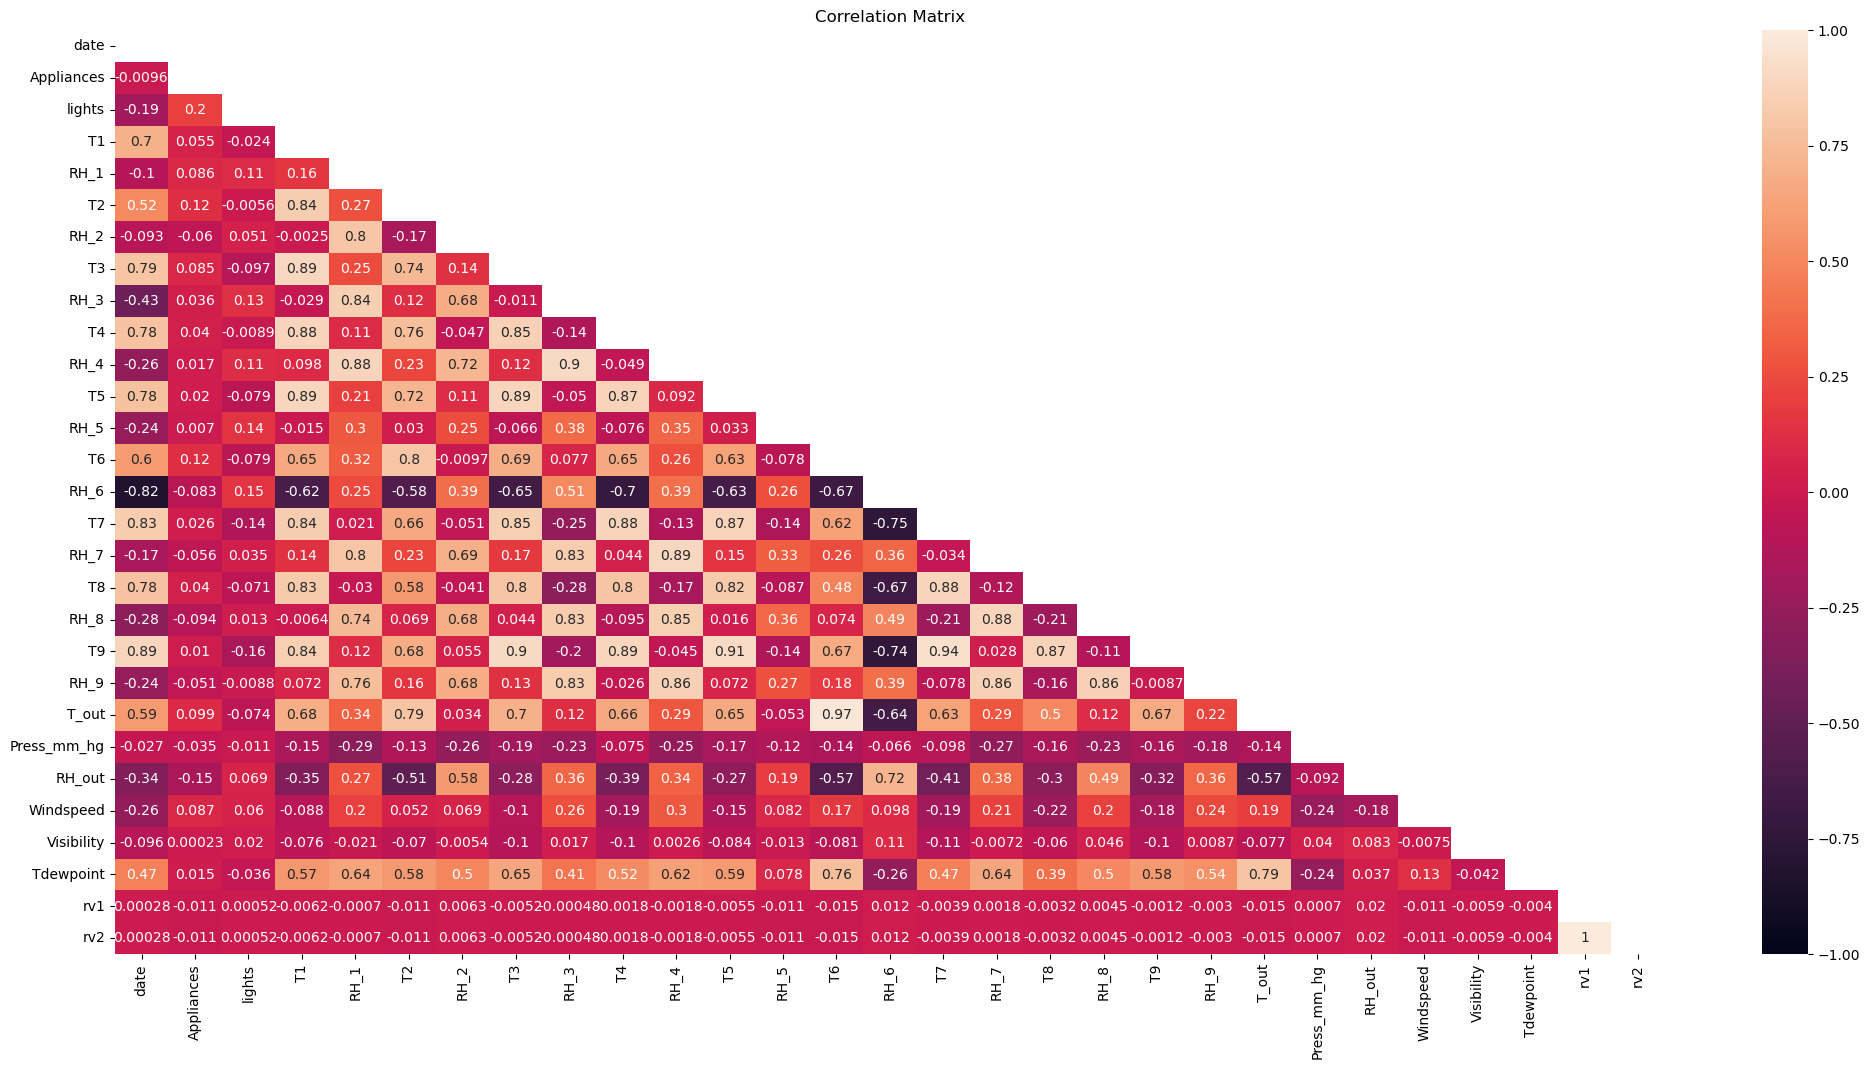

In [35]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(25, 12), dpi=100)
sns.heatmap(correlation_matrix, annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

<li>We can see that the temperature in different rooms shows the positive correlations with appliance energy consumption. If the temperature in the room increases the appliance energy consumption tends to increase as well. Similarly, relative humidity in different rooms also has positive correlation with applience energy consumption.</li>
<li>The weather condition outside and dew point temperature is positively correlated with the energy consumption. If it is warmer outside then we can see increased energy consumption. Inversely, humdity outside has a negative correlation meaning lower humidity levels outside may coincide with higher appliance energy usage.</li>
<li>Windspeed, pressure, visibility has week correlation with the energy consumption and has a less impact.</li>
<li>Lighting energy consumption has a positive correlation with appliance energy consumption, how every it is relatively low.</li>
<li>The random variables 'random_variable_1' and 'random_variable_2' do not show significant correlations with appliance energy consumption.</li>

In [36]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 32 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   appliance_energy_consumption_wh          19735 non-null  int64  
 1   light_energy_consumption_wh              19735 non-null  int64  
 2   temperature_kitchen_area_c               19735 non-null  float64
 3   humidity_kitchen_area_percent            19735 non-null  float64
 4   temperature_living_room_area_c           19735 non-null  float64
 5   humidity_living_room_area_percent        19735 non-null  float64
 6   temperature_laundry_room_area_c          19735 non-null  float64
 7   humidity_laundry_room_area_percent       19735 non-null  float64
 8   temperature_office_room_c                19735 non-null  float64
 9   humidity_office_room_percent             19735 non-null  float64
 10  temperature_bathroom_c                   19735

In [37]:
# drop rv1, rv2
dataFrame = dataFrame.drop(['random_variable_1', 'random_variable_2'], axis=1)

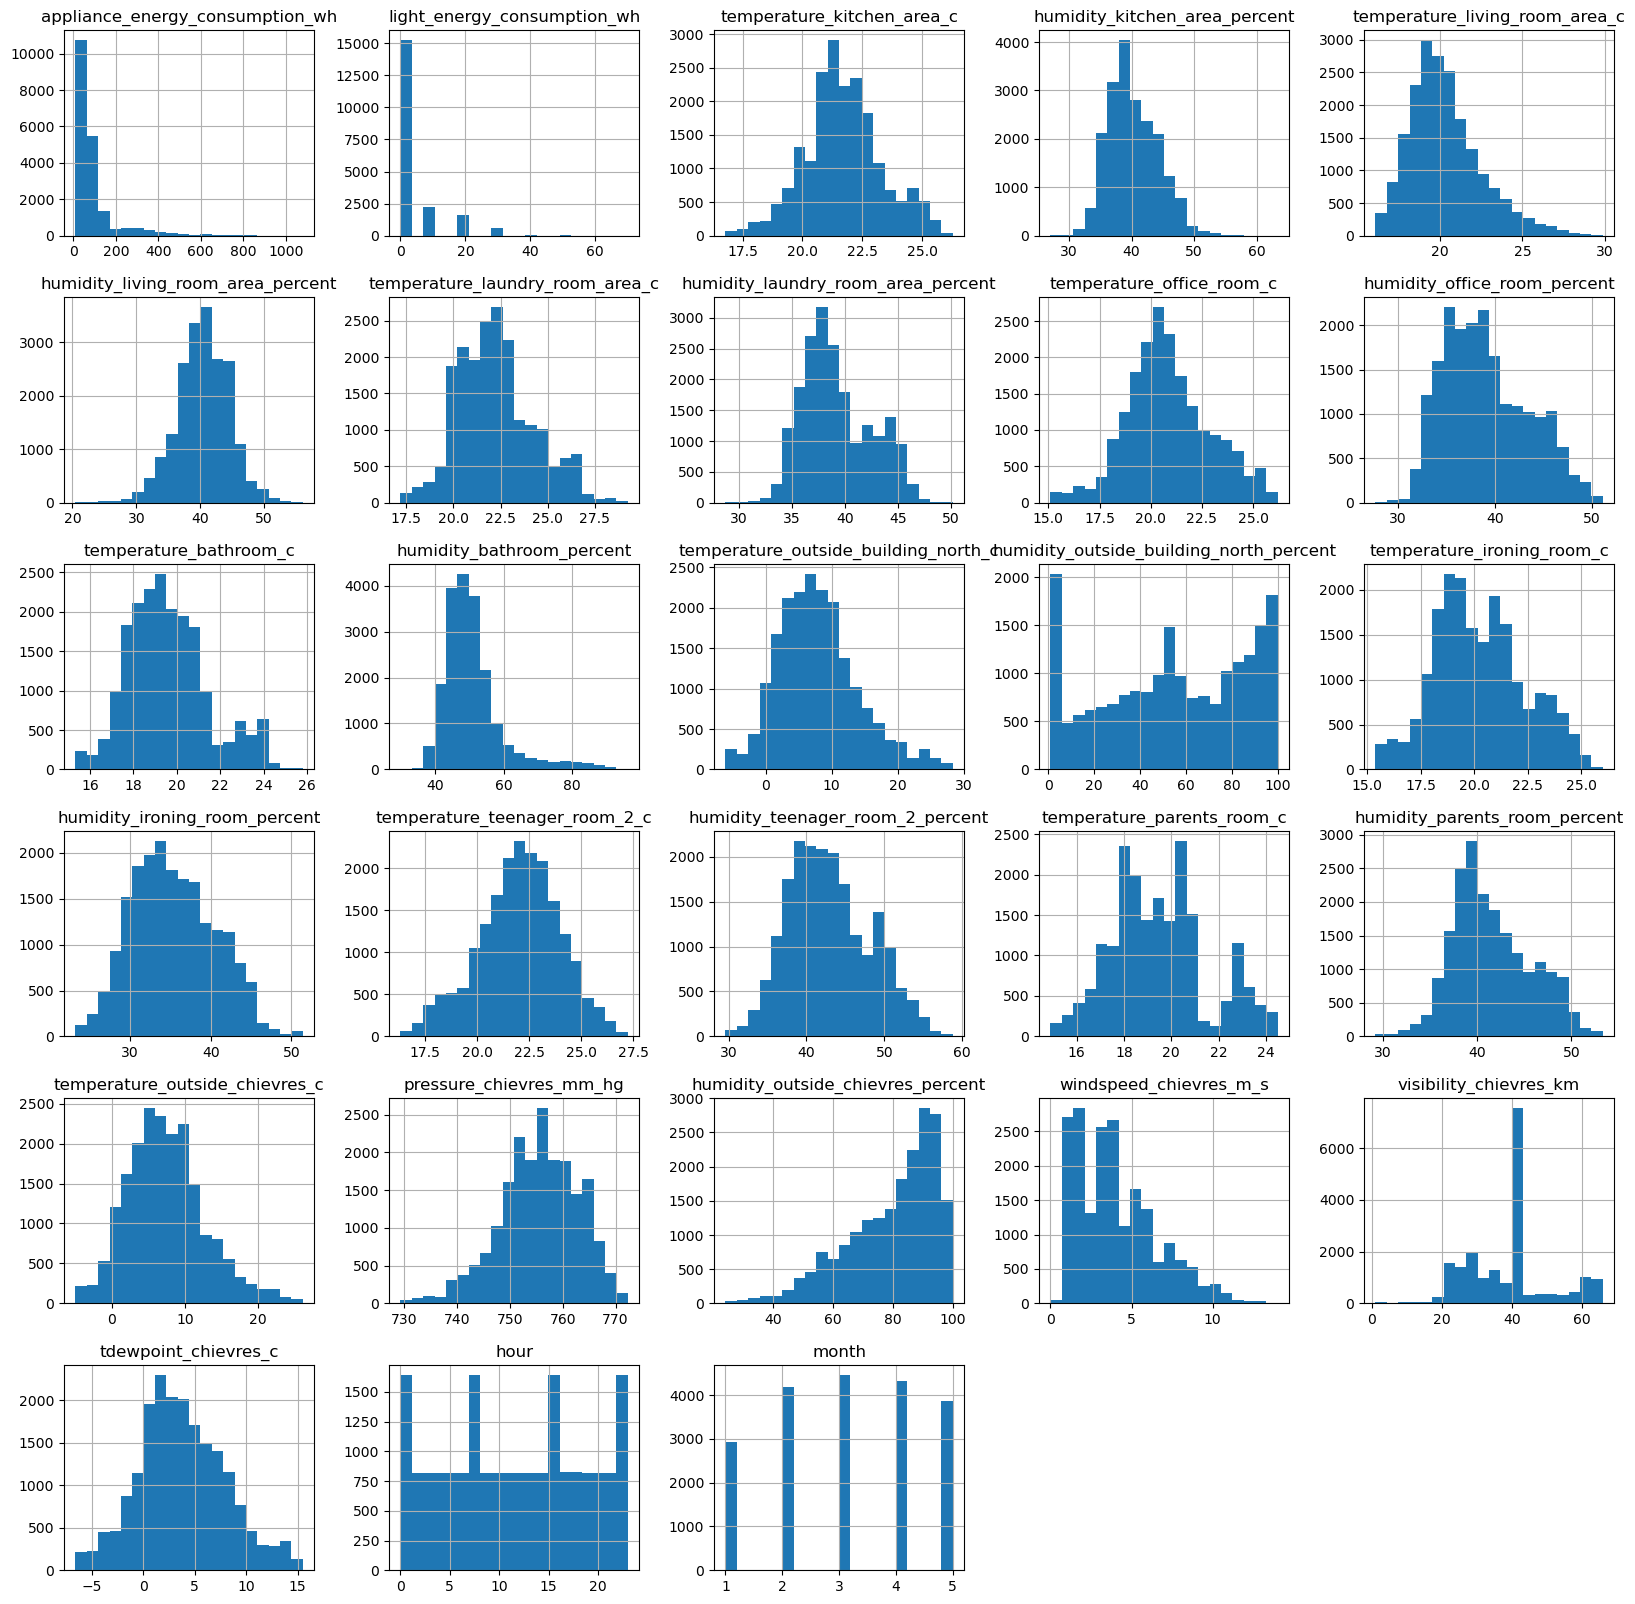

In [38]:
# print histogram
dataFrame.hist(figsize=(20,20),bins=20)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Temp According to month')

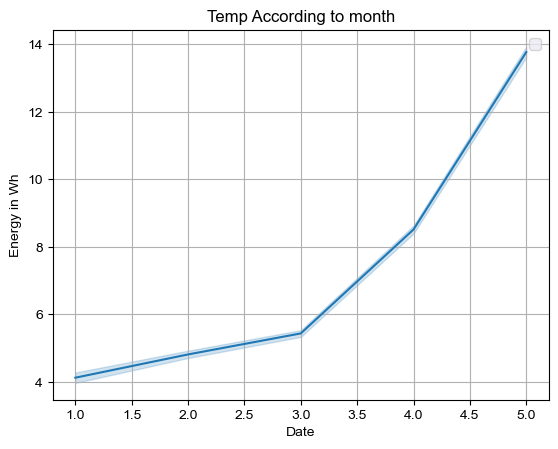

In [39]:
fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))
sns.lineplot(x=dataFrame["month"], y=dataFrame["temperature_outside_chievres_c"], data=dataFrame)
sns.set(rc={'figure.figsize':(15,6)})
plt.title("Temp in Months")
plt.xlabel("Date")
plt.ylabel("Energy in Wh")
plt.grid(True)
plt.legend()
plt.title("Temp According to month")

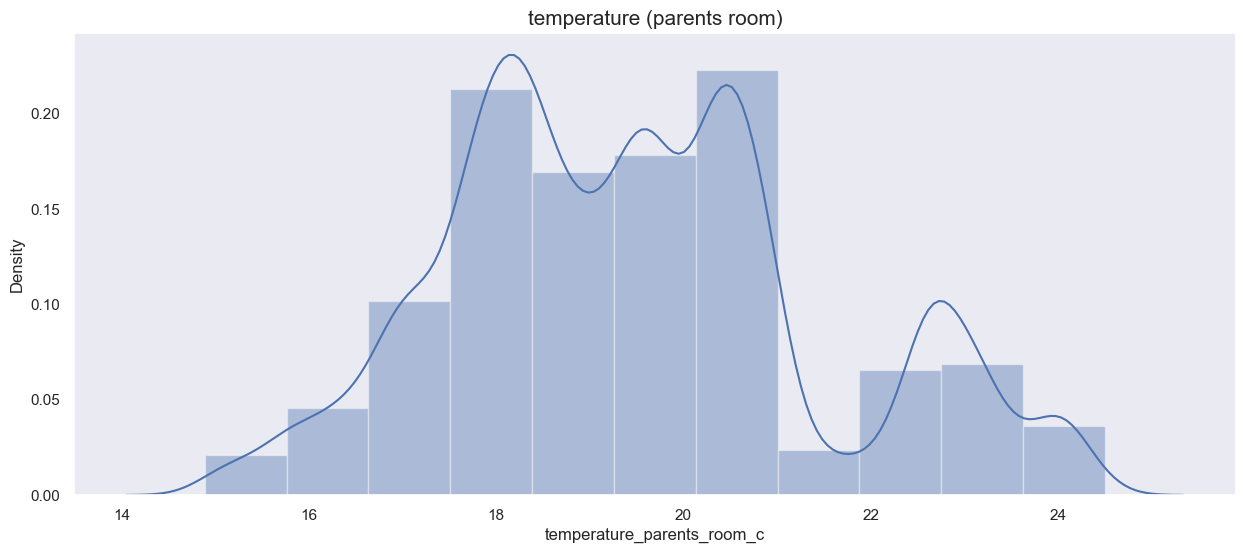

In [40]:
# Looking into par_temp in more detail:
sns.distplot(dataFrame.temperature_parents_room_c, bins = 11)                
plt.title('temperature (parents room)', fontsize = 15)
plt.grid()
plt.show()

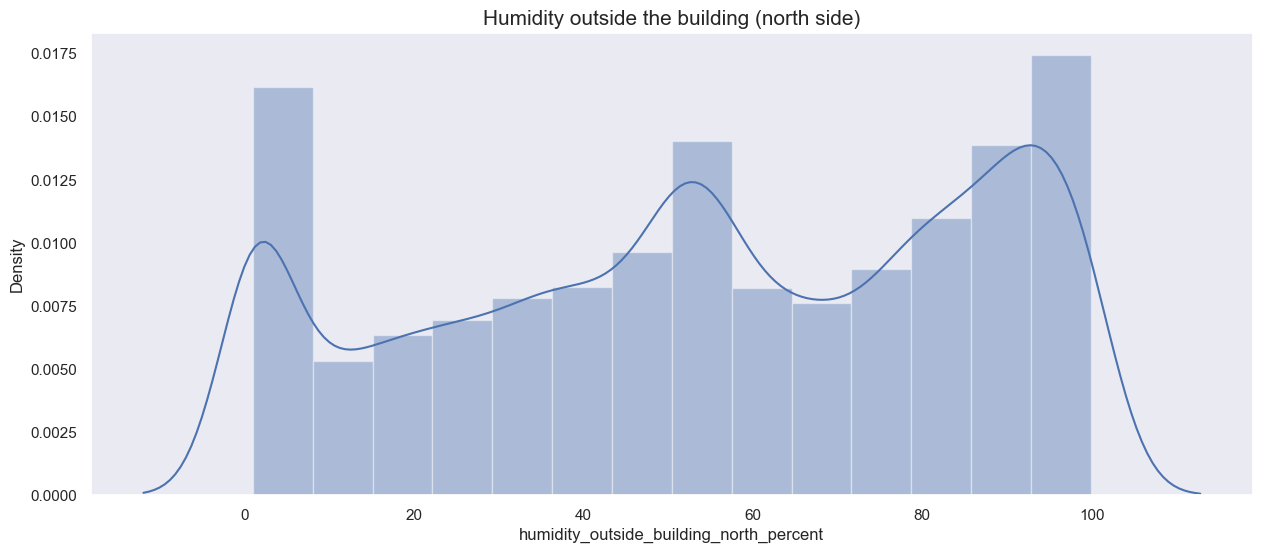

In [41]:
sns.distplot(dataFrame.humidity_outside_building_north_percent  , bins = 14) 
plt.title('Humidity outside the building (north side)', fontsize = 15)
plt.grid()
plt.show()


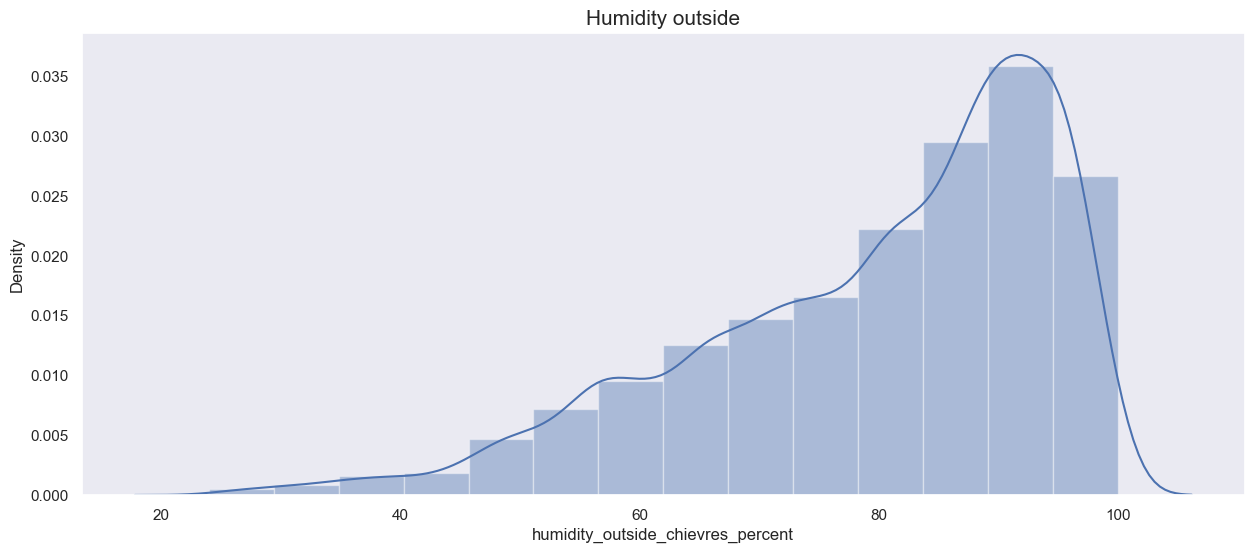

In [42]:
sns.distplot(dataFrame.humidity_outside_chievres_percent, bins = 14) 
plt.title('Humidity outside', fontsize = 15)
plt.grid()
plt.show()

1. **Temperature Distributions**:
- The temperature distributions seems to be normal in the majority of distributions. Thisiss expected because the temperature in different rooms or areas is usually a direct function of heating or cooling systems, which leads to most of the temperatures showing a normal distribution around an average valuen.

2. **Humidity Distributions**:
- Extreme humidity distributions are mostly Gaussian except humidity_outside_chievres_percenth_hum' which is positively sk
es available.
sidential spaces.h.

**It contains a mix of numerical and categorical features, and we need high predictive accuracy, Random Forest and Gradient Boosting are suitable choices. Support Vector Machines (SVM) are efficient in tasks which require to make a choice within non-linear boundaries of the decision-making.  Ridge Regression on the other hand is well suited for linear regression problems sheared by multicollinearity because it overpasses the overfitting problem by adding a regularization term to the cost function. [3]**


### 3. Pre-process the data

In [43]:
X= dataFrame.drop(['appliance_energy_consumption_wh', 'Date', 'Time', 'hour'],axis=1)
y = dataFrame['appliance_energy_consumption_wh']

In [44]:
from sklearn.preprocessing import StandardScaler

min_max_scaler = StandardScaler()
X_train_, X_test_, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train = min_max_scaler.fit_transform(X_train_)
X_test= min_max_scaler.transform(X_test_)

In [45]:
y_train = np.array(y_train).reshape(len(y_train),1)
y_test = np.array(y_test).reshape(len(y_test),1)

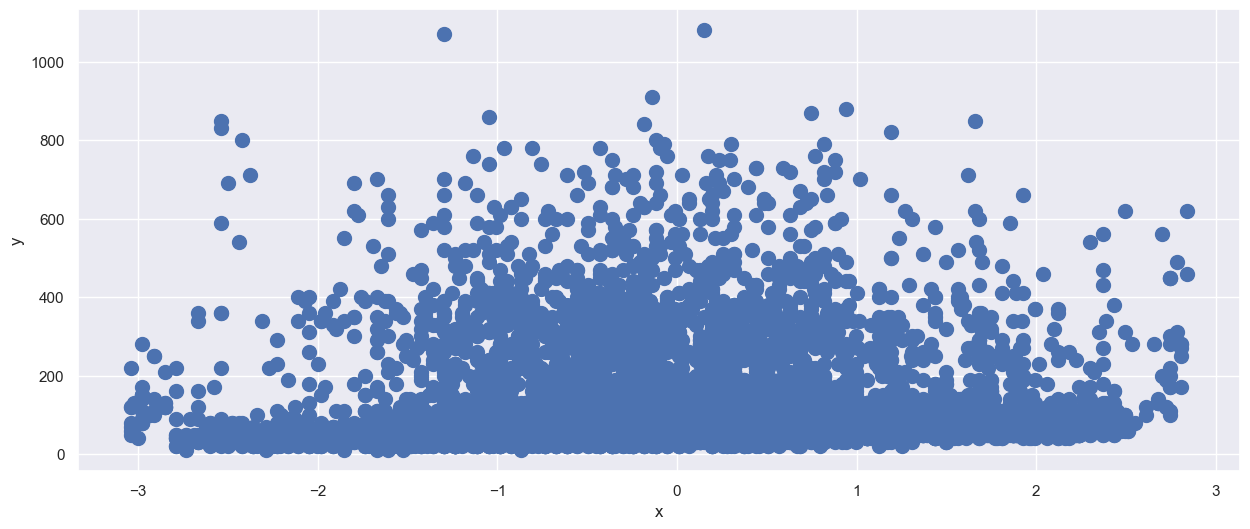

In [46]:
# visualise data of number_of_points from training, giving different attributes of x_train for x axis
number_of_points = 100
plt.scatter(X_train[:,1],y_train,s=number_of_points)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<b>
As a preprocessing to predict appliance consumption, we drop the columns which are not correlated with the appliance energy consumption. The dataset is splitted into a 70% training set and 30% percent testing set. Random seed is also set to ensure consistent random number generation across different runs of the code. The input feature excluding target variables is standardized.</b> 


### 4. Implement, train and test prediction models

#### 4.1 Grid Search CV for Ridge Linear Model

In [48]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 4.0, 5.0, 6.0, 10.0, 20, 50, 100]}
ridge = Ridge(random_state=42)
model_search = GridSearchCV(estimator=ridge, param_grid=params, scoring='neg_mean_absolute_error', cv=10, return_train_score=True,verbose=1)
model_search.fit(X_train, y_train)
print("Best parameters:", model_search.best_params_)
print("Best score:", model_search.best_score_)

Fitting 10 folds for each of 14 candidates, totalling 140 fits
Best parameters: {'alpha': 100}
Best score: -52.933288159373774


In [49]:
grid_search_result = pd.DataFrame(model_search.cv_results_)
grid_search_result = grid_search_result[grid_search_result['param_alpha']<=100]
grid_search_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.003597,0.003610,0.001502,0.002884,0.0001,{'alpha': 0.0001},-57.836613,-52.817004,-53.037995,-49.629079,...,-52.993648,-53.546518,-52.456204,-52.941138,-53.313734,-53.666587,-52.528720,-53.268525,-52.993163,0.463523
1,0.002566,0.002895,0.000000,0.000000,0.001,{'alpha': 0.001},-57.836611,-52.816998,-53.037993,-49.629078,...,-52.993645,-53.546514,-52.456200,-52.941134,-53.313730,-53.666583,-52.528716,-53.268521,-52.993160,0.463523
2,0.002999,0.004581,0.000000,0.000000,0.01,{'alpha': 0.01},-57.836587,-52.816938,-53.037975,-49.629068,...,-52.993611,-53.546476,-52.456155,-52.941099,-53.313692,-53.666547,-52.528678,-53.268484,-52.993122,0.463524
3,0.003867,0.004750,0.000000,0.000000,0.05,{'alpha': 0.05},-57.836480,-52.816670,-53.037896,-49.629025,...,-52.993464,-53.546307,-52.455958,-52.940941,-53.313523,-53.666386,-52.528510,-53.268316,-52.992954,0.463527
4,0.002627,0.004048,0.000000,0.000000,0.1,{'alpha': 0.1},-57.836345,-52.816336,-53.037798,-49.628971,...,-52.993280,-53.546095,-52.455711,-52.940745,-53.313312,-53.666185,-52.528301,-53.268108,-52.992745,0.463530
5,0.003291,0.002483,0.000498,0.000498,0.5,{'alpha': 0.5},-57.835271,-52.813719,-53.037015,-49.628581,...,-52.991812,-53.544420,-52.453765,-52.939180,-53.311637,-53.664626,-52.526646,-53.266451,-52.991088,0.463565
6,0.003724,0.003656,0.000116,0.000298,1.0,{'alpha': 1.0},-57.833928,-52.810551,-53.036055,-49.628092,...,-52.990000,-53.542378,-52.451395,-52.937254,-53.309574,-53.662713,-52.524639,-53.264429,-52.989060,0.463608
7,0.002995,0.003417,0.000000,0.000000,4.0,{'alpha': 4.0},-57.826151,-52.792630,-53.030735,-49.625353,...,-52.979917,-53.530957,-52.438368,-52.926321,-53.298038,-53.652166,-52.513523,-53.252950,-52.977714,0.463874
8,0.002299,0.003428,0.001000,0.002999,5.0,{'alpha': 5.0},-57.823653,-52.786952,-53.029062,-49.624424,...,-52.976794,-53.527446,-52.434431,-52.922905,-53.294397,-53.648943,-52.510162,-53.249397,-52.974211,0.463950
9,0.004004,0.004904,0.000000,0.000000,6.0,{'alpha': 6.0},-57.821198,-52.781414,-53.027495,-49.623414,...,-52.973769,-53.524061,-52.430660,-52.919607,-53.290827,-53.645832,-52.506931,-53.246053,-52.970834,0.464028


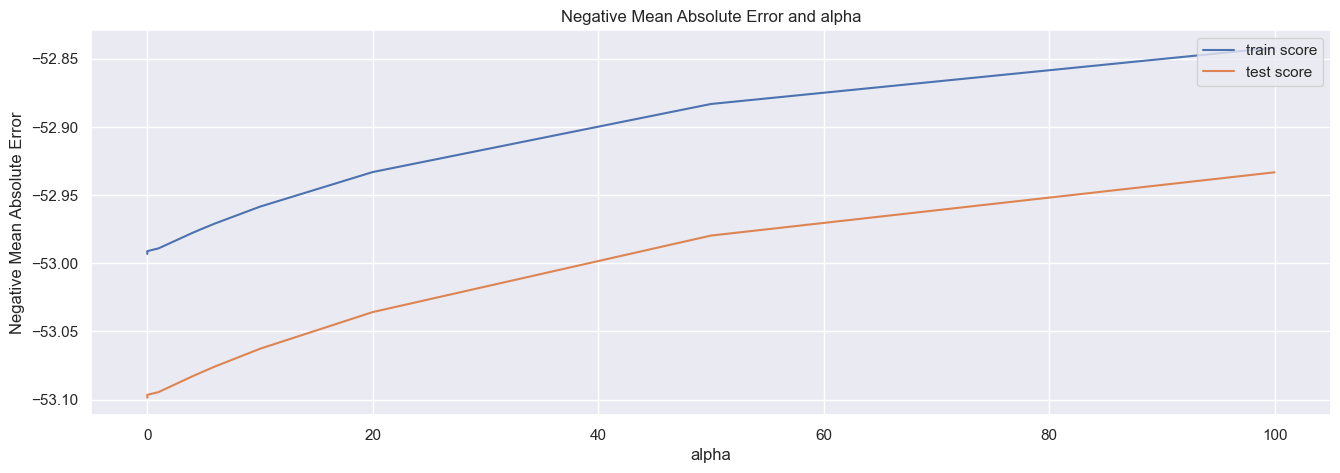

In [50]:
# plotting mean test and train scoes with alpha 
grid_search_result['param_alpha'] = grid_search_result['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(grid_search_result['param_alpha'], grid_search_result['mean_train_score'])
plt.plot(grid_search_result['param_alpha'], grid_search_result['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

#### 4.2 Best Ridge Linear Model

In [51]:
ridge = Ridge(alpha=4.0)
ridge.fit(X_train, y_train)
y_train_pred = ridge.predict(X_train)
ridge_score_train = r2_score(y_train, y_train_pred)
y_test_pred = ridge.predict(X_test)
ridge_score_test = r2_score(y_test, y_test_pred)
rmse_rd = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Coefficients of the Ridge model
ridge_coefficients = ridge.coef_

print("R-squared score for Ridge Regression on training set:", ridge_score_train)
print("R-squared score for Ridge Regression on test set:", ridge_score_test)
print("RMSE for Ridge Regression model:", rmse_rd)
print("Coefficients of the Ridge model:", ridge_coefficients)

R-squared score for Ridge Regression on training set: 0.16534556046146942
R-squared score for Ridge Regression on test set: 0.16924720848133734
RMSE for Ridge Regression model: 92.51449460163813
Coefficients of the Ridge model: [[ 15.8548891   -4.39327903  60.56211648 -33.83702122 -50.71781185
   53.67746921  13.24200113  -7.64675444  -6.73241027  -2.02915724
    1.29720517  37.02685868   3.50915254   0.47555803  -7.386501
   15.83374331 -22.79193873 -20.54787089  -6.03501884 -38.65396463
    1.16121651  -7.89993512   3.56893783   1.86136998  16.19024138
  -16.8781719 ]]


#### 4.3 Grid Search CV for Random Forest Regressor

In [53]:
params = {
    'n_estimators': [500, 600, 800, 1000],
    'max_depth': [8, 15]
}

random_forest = RandomForestRegressor(random_state=42)

# Performing grid search with cross-validation
grid_search_rf = GridSearchCV(estimator=random_forest, param_grid=params, scoring='neg_mean_absolute_error', cv=10, return_train_score=True,verbose=1, n_jobs=-1)

# Fitting the grid search model to the training data
grid_search_rf.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters for RandomForestRegressor:", grid_search_rf.best_params_)
print("Best score for RandomForestRegressor:", grid_search_rf.best_score_)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best parameters for RandomForestRegressor: {'max_depth': 15, 'n_estimators': 1000}
Best score for RandomForestRegressor: -37.05492013928223


#### 4.4 Best Random Forest Regressor

In [55]:
# Creating and fitting the Random Forest Regressor model
random_forest = RandomForestRegressor(n_estimators=500, max_depth=15, random_state=42)
random_forest.fit(X_train, y_train)

# Predictions on training set
y_train_pred = random_forest.predict(X_train)

# R-squared score on training set
rf_score_train = r2_score(y_train, y_train_pred)

# Predictions on test set
y_test_pred = random_forest.predict(X_test)

# R-squared score on test set
rf_score_test = r2_score(y_test, y_test_pred)

rmse_rf=np.sqrt(mean_squared_error(y_test, y_test_pred))


print("R-squared score for Random Forest Regressor on training set:", rf_score_train)
print("R-squared score for Random Forest Regressor on test set:", rf_score_test)
print("RMSE for Random Forest Regressor model:", rmse_rf)


R-squared score for Random Forest Regressor on training set: 0.8636632729229176
R-squared score for Random Forest Regressor on test set: 0.47632884456081037
RMSE for Random Forest Regressor model: 73.45192845258677


#### 4.5 Grid Search CV for Gradient Boosting

In [56]:
params = {'max_depth': [1, 2, 3, 4, 5]}
gradient_boost_regressor = GradientBoostingRegressor(random_state=42)
grid_search_gb = GridSearchCV(estimator=gradient_boost_regressor, param_grid=params, scoring='neg_mean_absolute_error', cv=10, return_train_score=True,verbose=1)
grid_search_gb.fit(X_train, y_train)
print("Best parameters for GradientBoostingRegressor:", grid_search_gb.best_params_)
print("Best score for GradientBoostingRegressor:", grid_search_gb.best_score_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Best parameters for GradientBoostingRegressor: {'max_depth': 5}
Best score for GradientBoostingRegressor: -42.428787552381145


#### 4.6 Best Gradient Boosting

In [57]:
# Creating and fitting the Gradient Boosting Regressor model with the best parameters
gradient_boosting = GradientBoostingRegressor(max_depth=5, random_state=42)
gradient_boosting.fit(X_train, y_train)

# Predictions on training set
y_train_pred = gradient_boosting.predict(X_train)

# R-squared score on training set
gb_score_train = r2_score(y_train, y_train_pred)

# Predictions on test set
y_test_pred = gradient_boosting.predict(X_test)

# R-squared score on test set
gb_score_test = r2_score(y_test, y_test_pred)

# Root mean squared error
rmse_gb = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("R-squared score for Gradient Boosting Regressor on training set:", gb_score_train)
print("R-squared score for Gradient Boosting Regressor on test set:", gb_score_test)
print("RMSE for Gradient Boosting Regressor model:", rmse_gb)


R-squared score for Gradient Boosting Regressor on training set: 0.6009991723448258
R-squared score for Gradient Boosting Regressor on test set: 0.3768793838827085
RMSE for Gradient Boosting Regressor model: 80.12350442876435


#### 4.7 Grid Search CV for SVM

In [58]:
params = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

svm_model = SVR()

grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=params, scoring='neg_mean_absolute_error', cv=10, return_train_score=True,verbose=1, n_jobs=-1)

grid_search_svm.fit(X_train, y_train)

print("Best parameters for Support Vector Machine:", grid_search_svm.best_params_)
print("Best score for Support Vector Machine:", grid_search_svm.best_score_)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
Best parameters for Support Vector Machine: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best score for Support Vector Machine: -40.48391896618207


#### 4.8 Best SVM model

In [59]:
best_svm_model = SVR(C=10, gamma='scale', kernel='rbf')
best_svm_model.fit(X_train, y_train)
y_train_pred = best_svm_model.predict(X_train)
y_test_pred = best_svm_model.predict(X_test)
svm_train_r2_score = r2_score(y_train, y_train_pred)
svm_test_r2_score = r2_score(y_test, y_test_pred)
svm_rmse_test_score = mean_squared_error(y_test, y_test_pred, squared=False)

print("Train R² score:", svm_train_r2_score)
print("Test R² score:", svm_test_r2_score)
print("RMSE test score:", svm_rmse_test_score)

Train R² score: 0.11790055445816905
Test R² score: 0.10948400493083621
RMSE test score: 95.78439010245148


### 5. Compare the results from all candidate models, choose the best model, justify your choice and discuss the results

In [60]:
models = [
    {'Name': 'Ridge Regression',
     'Train R² score': ridge_score_train,
     'Test R² score': ridge_score_test
    },
    {'Name': 'Random Forest Regressor',
     'Train R² score': rf_score_train,
     'Test R² score': rf_score_test
    },
    {'Name': 'Gradient Boosting Regressor',
     'Train R² score': gb_score_train,
     'Test R² score': gb_score_test
    },
    {'Name': 'Support Vector Machine',
    'Train R² score': svm_train_r2_score,
    'Test R² score': svm_test_r2_score,
    }
]

models_df = pd.DataFrame(models)
print(models_df)

                          Name  Train R² score  Test R² score
0             Ridge Regression        0.165346       0.169247
1      Random Forest Regressor        0.863663       0.476329
2  Gradient Boosting Regressor        0.600999       0.376879
3       Support Vector Machine        0.117901       0.109484


<b>
From the above training of different models we select Random Forest Regressor and Gradient Boosting Regressor as they have good R² scores  Support Vector Machine was shown to be least favorable, having the smallest R² scores for both datasets when compared to other models, indicating a poor learning of underlying patterns</b>.




In [79]:
# Extracting the importance of features
random_forest_importances = random_forest.feature_importances_
gradient_boosting_importances = gradient_boosting.feature_importances_

In [80]:
# Getting feature names and sort them
index_random_forest = np.argsort(random_forest_importances)[::-1]
index_gradient_boosting = np.argsort(gradient_boosting_importances)[::-1]
X_train_ = pd.DataFrame(X_train_)
features = X_train_.columns

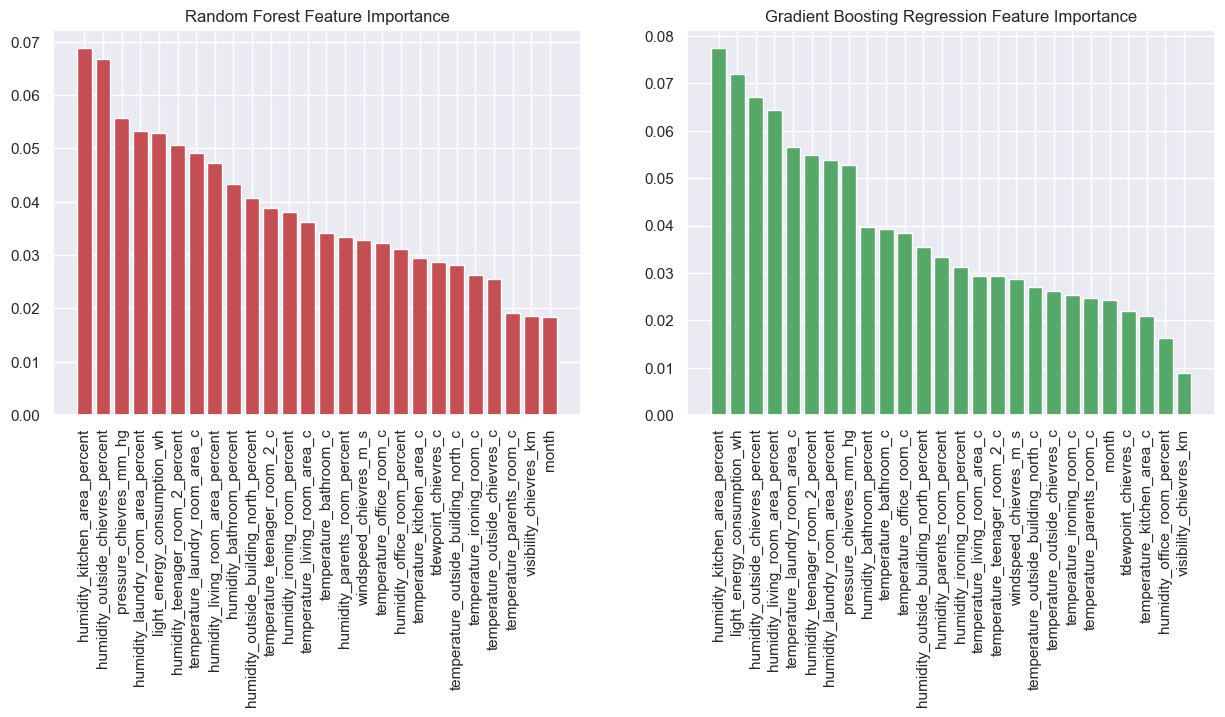

In [81]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
# Plotting the importance of random forest features
axs[0].bar(range(X_train.shape[1]), random_forest_importances[index_random_forest], color="r", align="center")
axs[0].set_xticks(range(X_train_.shape[1]))
axs[0].set_xticklabels(features[index_random_forest],rotation=90)
axs[0].set_title("Random Forest Feature Importance")
# Plotting the importance of GBM features
axs[1].bar(range(X_train.shape[1]), gradient_boosting_importances[index_gradient_boosting], color="g", align="center")
axs[1].set_xticks(range(X_train_.shape[1]))
axs[1].set_xticklabels(features[index_gradient_boosting],rotation=90)
axs[1].set_title("Gradient Boosting Regression Feature Importance")
plt.show()

In [89]:
print("Top 5 important feature using Random Forest Regressor:\n")
for index, feature in enumerate(features[index_random_forest][:5]):
    print(index+1, feature)

Top 5 important feature using Random Forest Regressor:

1 humidity_kitchen_area_percent
2 humidity_outside_chievres_percent
3 pressure_chievres_mm_hg
4 humidity_laundry_room_area_percent
5 light_energy_consumption_wh


In [90]:
print("Top 5 important feature using Gradient Boosting Regression:\n")
for index, feature in enumerate(features[index_gradient_boosting][:5]):
    print(index+1, feature)

Top 5 important feature using Gradient Boosting Regression:

1 humidity_kitchen_area_percent
2 light_energy_consumption_wh
3 humidity_outside_chievres_percent
4 humidity_living_room_area_percent
5 temperature_laundry_room_area_c


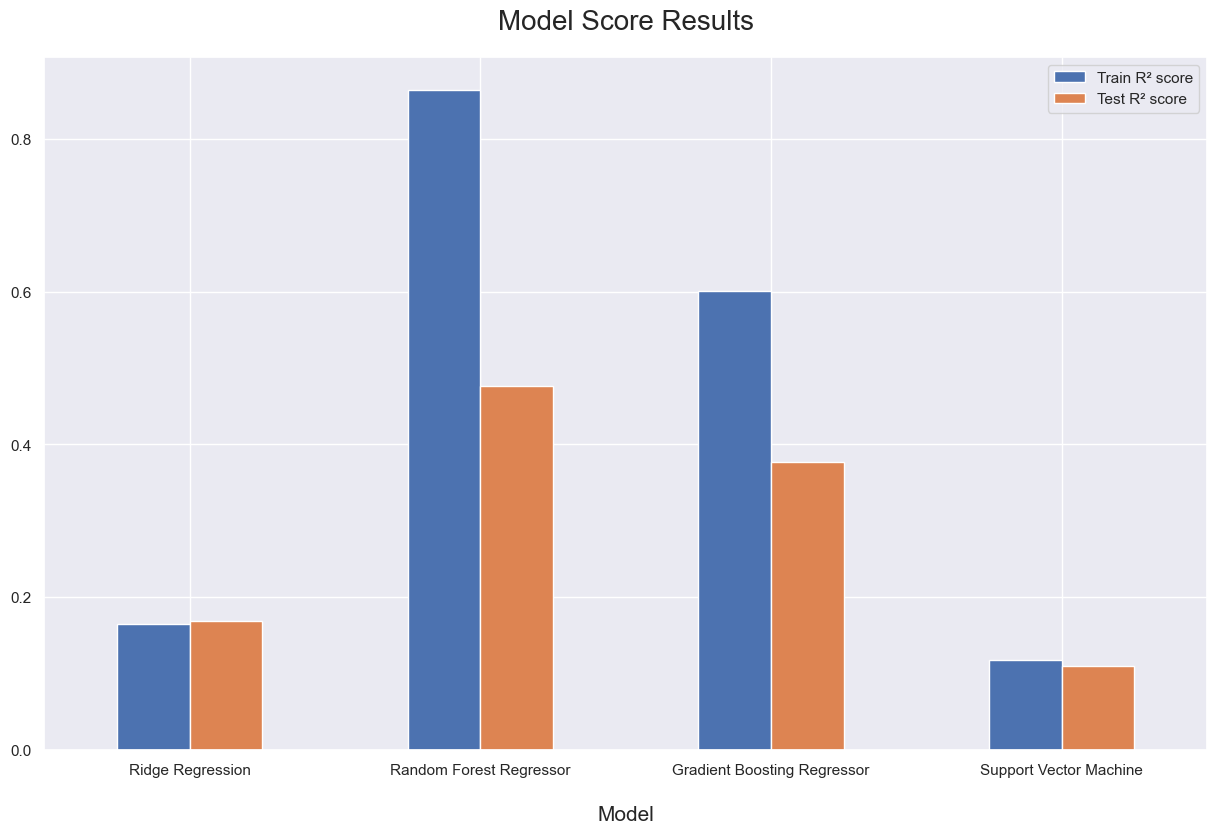

In [69]:
# plotting all model results
models_df.plot(figsize = (15,9), kind = 'bar', x = 'Name')
plt.title('Model Score Results', fontsize = 20, pad = 20)
plt.xlabel('Model', fontsize = 15, labelpad = 20)
plt.tick_params(axis = 'x', labelrotation = 0)
plt.show()

In [70]:
# Create a list of dictionaries containing model results
models = [
    {'Name': 'Ridge Regression',
     'RMSE test score': rmse_rd},
    
    {'Name': 'Random Forest Regressor',
     'RMSE test score': rmse_rf},
    
    {'Name': 'Gradient Boosting Regressor',
     'RMSE test score': rmse_gb},

    {'Name': 'Support Vector Machine',
    'RMSE test score': svm_rmse_test_score
}
]

# Convert the list of dictionaries to a DataFrame
models_df = pd.DataFrame(models)

# Display the DataFrame
print(models_df)


                          Name  RMSE test score
0             Ridge Regression        92.514495
1      Random Forest Regressor        73.451928
2  Gradient Boosting Regressor        80.123504
3       Support Vector Machine        95.784390


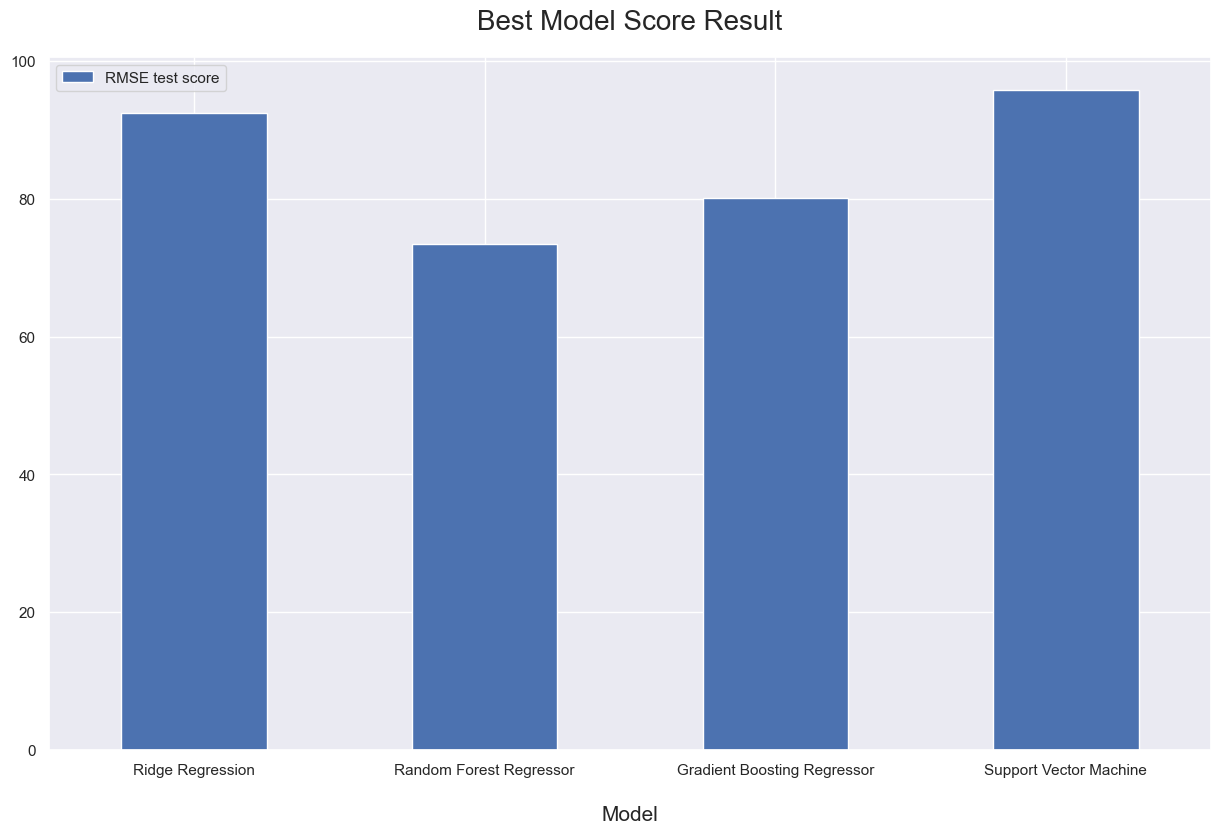

In [71]:
models_df.plot(figsize = (15,9), kind = 'bar', x = 'Name')
plt.title('Best Model Score Result', fontsize = 20, pad = 20)
plt.xlabel('Model', fontsize = 15, labelpad = 20)
plt.tick_params(axis = 'x', labelrotation = 0)
plt.show()


<b>Remarkably, the Random Forest Regressor has the lowest RMSE score of 73.45 which is found to be the highest in the case of other models. Even though Gradient Boosting Regressor was a close competition, however had more prediction error. SVM performed worst.</b>

In [72]:
models = [
    {'Name': 'Random Forest Regressor',
     'Train R² score': rf_score_train,
     'Test R² score': rf_score_test
    }
]

models_df = pd.DataFrame(models)
print(models_df)


                      Name  Train R² score  Test R² score
0  Random Forest Regressor        0.863663       0.476329


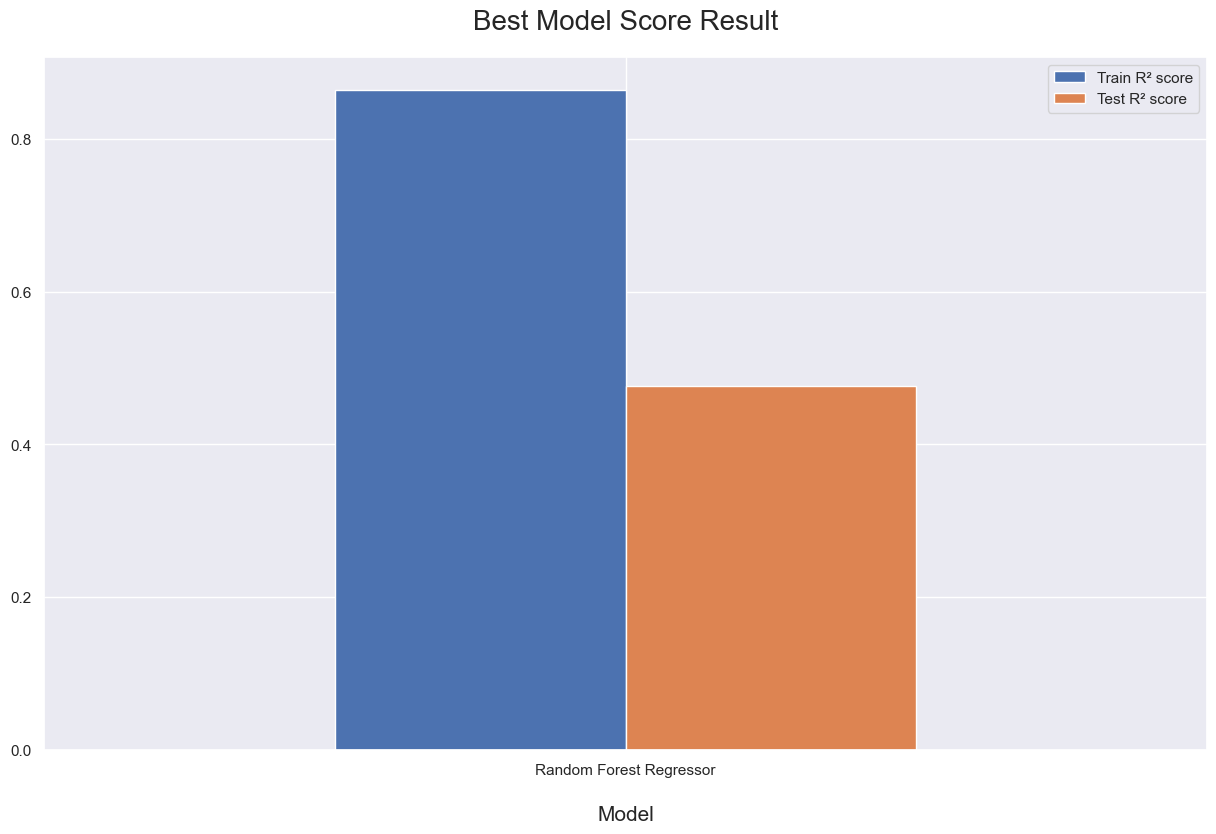

In [73]:
models_df.plot(figsize = (15,9), kind = 'bar', x = 'Name')
plt.title('Best Model Score Result', fontsize = 20, pad = 20)
plt.xlabel('Model', fontsize = 15, labelpad = 20)
plt.tick_params(axis = 'x', labelrotation = 0)
plt.show()


### 6. Reflect on what you have learned by completing this assignment and how to improve the models

I believe the assignment on a energy prediction in a house using machine learning techniques has really made my machine learning abilities better. While working on the project I got to deal with different data preprocessing aspects from which I have been applying several techniques among them there are scaling, conversion, handling of missing values. I can evaluate feature relationships, and discover some outliers using visual experience such as heatmap and histograms.

A key learning moment from this task was how feature selection is essential for model accuracy. Through-the-careful tuning of the feature set, I could consistently achieve significant improvement of predictive performance. The selection of model and hyperparameter tuning via the cross-validation processes became a remarkable to me because of the fact that they lay the foundation for model accuracy and generalization.

When it came to model evaluation, I was very precise when I selected evaluation metrics, mainly the R-square and the root mean square error (RMSE), both common for regression models. These metrics are driving the comprehensive knowledge of the model performance and iterative upgrades.

I have learned a number of things along my way through this project, and it was very helpful when I ran into different challenges. Therefore, I have referred to the course materials and workshops for guidance. Such an experience was even more than just a matter of problem-solving, but well-grounded of the fundamentals as well. Looking at my work now, it is clear that I need more advanced strategies for feature selection to further improve model accuracy and dependaby.





### 7. References

[1] Candanedo Ibarra, L., Feldheim, V., & Deramaix, D. (2017). Data driven prediction models of energy use of appliances in a low-energy house. *Energy and Buildings, 140*. DOI: [10.1016/j.enbuild.2017.01.083](https://doi.org/10.1016/j.enbuild.2017.01.083)

[2] Chicco, Davide & Warrens, Matthijs & Jurman, Giuseppe. (2021). The coefficient of determination R-squared is more informative than SMAPE, MAE, MAPE, MSE and RMSE in regression analysis evaluation. PeerJ Computer Science. 7. e623. 10.7717/peerj-cs.623.

[3]Verma, N. (2023). Understanding Random Forest Regression: A Powerful Machine Learning Algorithm for Continuous. Medium. Retrieved from https://medium.com/@nandiniverma78988/understanding-random-forest-regression-a-powerful-machine-learning-algorithm-for-continuous-e48228a86154

[4] Grogan, M. (2020). Support Vector Machines and Regression Analysis. Towards Data Science. Retrieved from https://towardsdatascience.com/support-vector-machines-and-regression-analysis-ad5d94ac857f